### Vr3 - Relative change between pre and post GPT
- consider count values, not percentage value like vr.2

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import sqlite3
import pandas as pd
from nltk import FreqDist
import pickle
import math
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

with open('/data1/StackOverflow/Tag_Analysis/df_tags_2023.pickle', 'rb') as fr:
    df_tags = pickle.load(fr)

In [2]:
import pandas as pd
from nltk import FreqDist
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def tag_freq(data):
    tags = data['tags'].str.replace('[\["\]]', '', regex=True)
    tags = [tag for i in tags.apply(lambda x: wc(x)) for tag in i.split(', ')]
    result = FreqDist(tags)
    return result

In [3]:
# Preprocessing
df_tags['creation_date'] = pd.to_datetime(df_tags['creation_date'])
df_tags['year_month'] = df_tags['creation_date'].dt.to_period('D')
df_tags['year_month'] = df_tags['year_month'].astype(str)
year_month = df_tags.year_month.unique()

In [4]:
# load pickle
import pickle
with open('/data1/StackOverflow/diff_in_diff/daily_tagShare_modified.pickle', 'rb') as fr:
    all_keys = pickle.load(fr)

In [5]:
# Split into counts and share vals.
df_count = all_keys.iloc[:,0::2]


df_share = all_keys.drop('tag', axis = 1)
df_share = df_share.iloc[:,0::2]

In [6]:
df_count

,index,tag_2020_11_30,tag_2020_12_01,tag_2020_12_02,tag_2020_12_03,tag_2020_12_04,tag_2020_12_05,tag_2020_12_06,tag_2020_12_07,tag_2020_12_08,...,tag_2023_08_25,tag_2023_08_26,tag_2023_08_27,tag_2023_08_28,tag_2023_08_29,tag_2023_08_30,tag_2023_08_31,tag_2023_09_01,tag_2023_09_02,tag_2023_09_03
0,amazonwebservices,47.0,59.0,57.0,86.0,64.0,33.0,30.0,55.0,74.0,...,39.0,23.0,18.0,49.0,56.0,47.0,57.0,38.0,25.0,13.0
1,forloop,19.0,21.0,27.0,32.0,27.0,27.0,12.0,21.0,28.0,...,3.0,4.0,9.0,7.0,7.0,11.0,4.0,4.0,3.0,3.0
2,foreach,9.0,5.0,3.0,6.0,5.0,9.0,3.0,7.0,3.0,...,1.0,1.0,NaN,1.0,2.0,3.0,2.0,1.0,1.0,NaN
3,terraform,13.0,12.0,10.0,8.0,18.0,7.0,6.0,6.0,12.0,...,8.0,7.0,5.0,10.0,18.0,13.0,17.0,13.0,2.0,NaN
4,awsglue,3.0,5.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,...,NaN,2.0,1.0,5.0,2.0,2.0,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51948,applespeech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51949,jsonloader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51950,livescript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
51951,nxhtml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
tagTrend = {'tagName' : df_count['index'], 'preGPT': df_count.iloc[:, 641:731].mean(axis = 1, skipna=True),
              'postGPT' : df_count.iloc[:, 731:].mean(axis = 1, skipna=True)}
tagTrend = pd.DataFrame(tagTrend)

In [10]:
tagTrend

,tagName,preGPT,postGPT
0,amazonwebservices,58.388889,47.316547
1,forloop,21.377778,10.739130
2,foreach,3.908046,2.591489
3,terraform,13.566667,10.628159
4,awsglue,3.090909,3.075893
...,...,...,...
51948,applespeech,NaN,1.000000
51949,jsonloader,NaN,1.000000
51950,livescript,NaN,1.000000
51951,nxhtml,NaN,1.000000


In [21]:
# Convert nan to 0
tagTrend.fillna(0, inplace = True)
tagTrend['diff'] = (tagTrend['postGPT'] - tagTrend['preGPT'])/(tagTrend['preGPT']+0.1)

In [22]:
tagTrend

,tagName,preGPT,postGPT,diff
0,amazonwebservices,58.388889,47.316547,-0.189307
1,forloop,21.377778,10.739130,-0.495333
2,foreach,3.908046,2.591489,-0.328478
3,terraform,13.566667,10.628159,-0.215013
4,awsglue,3.090909,3.075893,-0.004706
...,...,...,...,...
51948,applespeech,0.000000,1.000000,10.000000
51949,jsonloader,0.000000,1.000000,10.000000
51950,livescript,0.000000,1.000000,10.000000
51951,nxhtml,0.000000,1.000000,10.000000


In [23]:
tagTrend.sort_values('diff', ascending = False)

,tagName,preGPT,postGPT,diff
49419,langchain,0.000000,4.322581,43.225806
43361,unityscript,0.000000,3.000000,30.000000
48197,nebulastudio,0.000000,3.000000,30.000000
48803,laravel10,0.000000,2.728814,27.288136
48709,nuxt3,0.000000,2.430000,24.300000
...,...,...,...,...
4663,publishing,3.000000,0.000000,-0.967742
33948,DOTnetmaui,3.885246,0.000000,-0.974907
1449,usestate,4.800000,0.000000,-0.979592
670,useeffect,5.250000,0.000000,-0.981308


In [25]:
tagTrend[tagTrend['tagName'] == 'python']

,tagName,preGPT,postGPT,diff
17,python,705.888889,463.014388,-0.34402


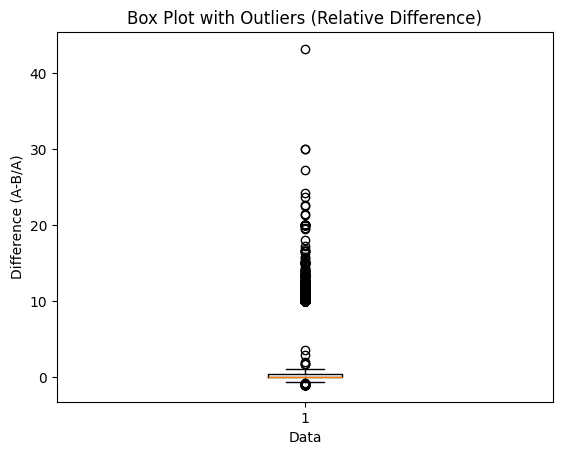

In [44]:
# Create a box plot
plt.boxplot(tagTrend['diff'])
plt.title('Box Plot with Outliers (Relative Difference)')
plt.xlabel('Data')
plt.ylabel('Difference (A-B/A)')
plt.show()

### 1) Percentile Approach

In [27]:
# Identify outliers
q1 = np.percentile(tagTrend['diff'], 25)
q3 = np.percentile(tagTrend['diff'], 75)
iqr = q3 - q1

# Outlier cutoffs
lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# Filter data for outliers
outliers = tagTrend[(tagTrend['diff'] < lower_bound)]
outliers

cleaned_data = tagTrend[(tagTrend['diff'] >= lower_bound)]

In [31]:
print('Outliers = ', len(outliers))
print('cleaned_df = ', len(cleaned_data))

Outliers =  2644
cleaned_df =  49309


In [29]:
outliers[outliers['tagName'] == 'python']

,tagName,preGPT,postGPT,diff


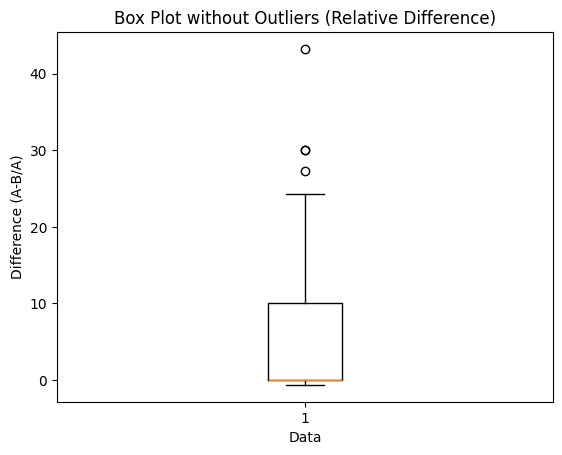

In [45]:
# Create a box plot without outliers
plt.boxplot(cleaned_data['diff'])
plt.title('Box Plot without Outliers (Relative Difference)')
plt.xlabel('Data')
plt.ylabel('Difference (A-B/A)')
plt.show()

### Model Construction

In [34]:
# Define square_sum function
def square_sum(numbers):
    result = sum(x**2 for x in numbers if not math.isnan(x))
    return result

In [35]:
cleansed = all_keys[all_keys['index'].isin(cleaned_data['tagName'])].reset_index(drop = True)
# Measure score
HHI_Score = []
# Calculate HHI for each monthly tag share column.
for i in range(3, cleansed.shape[1], 2):
    HHI_Score.append(square_sum(cleansed.iloc[:, i]))
result_HHI = pd.DataFrame({'year_month':year_month, 'HHI_Score':HHI_Score})

In [36]:
hhi = list(result_HHI[(result_HHI['year_month'] > '2021-08-31') &
           (result_HHI['year_month'] < '2023-09-01')].reset_index().HHI_Score) # fixed datetime
# Split Data
control_data = pd.DataFrame({'HHI' : hhi[:365],
              'T_d': [0]*len(hhi[:365]),
              'P_t' : [0]*90 + [1]*275})
treated_data = pd.DataFrame({'HHI' : hhi[365:],
              'T_d': [1]*len(hhi[365:]),
              'P_t' : [0]*90 + [1]*275})
df_did = pd.concat([control_data, treated_data], axis = 0).reset_index(drop = True)
# Add date and month feature
df_did['date'] = result_HHI[(result_HHI['year_month'] > '2021-08-31') &
           (result_HHI['year_month'] < '2023-09-01')].reset_index().year_month
df_did['month'] = pd.to_datetime(df_did['date']).dt.month
# Apply log
df_did['ln_y'] = np.log(df_did['HHI'])

In [37]:
sm.ols('ln_y ~ T_d + P_t + T_d * P_t + C(month)', df_did).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.2998,0.073,59.106,0.000,4.157,4.443
C(month)[T.2],-0.0276,0.018,-1.512,0.131,-0.063,0.008
C(month)[T.3],-0.0524,0.018,-2.942,0.003,-0.087,-0.017
C(month)[T.4],-0.0175,0.018,-0.975,0.330,-0.053,0.018
C(month)[T.5],-0.0532,0.018,-2.989,0.003,-0.088,-0.018
C(month)[T.6],-0.0723,0.018,-4.029,0.000,-0.108,-0.037
C(month)[T.7],-0.0579,0.018,-3.254,0.001,-0.093,-0.023
C(month)[T.8],-0.0934,0.018,-5.245,0.000,-0.128,-0.058
C(month)[T.9],0.0294,0.073,0.399,0.690,-0.115,0.174
C(month)[T.10],0.0549,0.073,0.748,0.455,-0.089,0.199


In [39]:
sm.ols('ln_y ~ T_d + P_t + T_d * P_t + C(month)', df_did).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ln_y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     114.7
Date:                Thu, 02 May 2024   Prob (F-statistic):          5.46e-172
Time:                        11:48:15   Log-Likelihood:                 659.27
No. Observations:                 730   AIC:                            -1289.
Df Residuals:                     715   BIC:                            -1220.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.2998      0.073     59.106      0.000       4.157       4.443
C(month)[T.2]     -0.0276      0.018     -1.512      0.131      -0.063       0.008
C(month)[T.3]     -0.0524      0.018     -2.942      0.003      -0.087      -0.017
C(month)[T.4]     -0.0175      0.018     -0.975      0.330      -0.053       0.018
C(month)[T.5]     -0.0532      0.018     -2.989      0.003      -0.088      -0.018
C(month)[T.6]     -0.0723      0.018     -4.029      0.000      -0.108      -0.037
C(month)[T.7]     -0.0579      0.018     -3.254      0.001      -0.093      -0.023
C(month)[T.8]     -0.0934      0.018     -5.245      0.000      -0.128      -0.058
C(month)[T.9]      0.0294      0.073      0.399      0.690      -0.115       0.174
C(month)[T.10]     0.0549      0.073      0.748      0.455      -0.089       0.199
C(month)[T.11]     0.0186      0.071      0.262      0.794      -0.121       0.158
C(month)[T.12]     0.0515      0.018      2.895      0.004       0.017       0.086
T_d               -0.0903      0.015     -6.115      0.000      -0.119      -0.061
P_t                0.0702      0.072      0.977      0.329      -0.071       0.211
T_d:P_t           -0.2153      0.017    -12.652      0.000      -0.249      -0.182
==============================================================================
Omnibus:                       49.948   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.831
Skew:                           0.591   Prob(JB):                     1.51e-11
Kurtosis:                       2.509   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""